## **Lab3 - Data Engineering & EDA with Python, SQL, and Pandas**

**Name:** Mandeep Singh Brar  
**Student ID:** 8989367  
**Course Name:** Machine Learning Programming  
**Course Code:** PROG8245

### **Part 1: Data Collection & Database Connection**

#### **1. Create a Free SQL Database**

**1.1 Step by Step for setting up Free SQL database:**  

- Using a Neon.tech for setting up a free Postgre Database for the Lab3.    
- Singup using the Github.  
- Creating a project with the project name, database name and selecting region.     
- Checking connection details on the dashboard, which are used to connect from Python. 

**1.2 Creating a Employee table**

- The table employees contains five fields:
   - **employee_id:** integer, primary key
   - **name:** string
   - **position:** string (IT job titles)
   - **start_date:** date (between 2015 and 2024)
   - **salary:** integer (between $60,000 and $200,000)

         CREATE TABLE employees (    
         employee_id SERIAL PRIMARY KEY,    
         name VARCHAR(50),   
         position VARCHAR(50),   
         start_date DATE,    
         salary INTEGER  
         );

### **2. Generate & Populate Data**

- I am generating the 50 Synthetic employee records with the help of Faker library. 

- Each of the records having a Unique ID, realistic names, random IT job title, starting date between 2015 to 2024 and salary range between $60,000 and $200,000.

In [12]:
!pip install faker

  Using cached faker-37.3.0-py3-none-any.whl.metadata (15 kB)
Using cached faker-37.3.0-py3-none-any.whl (1.9 MB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**2.1 Generate at least 50 synthetic records using Python and the Faker library.**

In [20]:
import random
import datetime
from faker import Faker

# Initialize Faker for generating fake names for employees
fakedata = Faker()

# List of possible IT-related job positions
positions = [
    'Software Engineer', 'Data Analyst', 'DevOps Engineer', 'ML Engineer', 'QA Engineer',
    'Backend Developer', 'Frontend Developer', 'Cloud Architect', 'SysAdmin', 'Data Scientist'
]

# Define start and end dates as datetime.date objects for the random date generator
start_dt = datetime.date(2015, 1, 1)
end_dt = datetime.date(2024, 6, 1)

# Generate and print 50 SQL INSERT statements with fake employee data
for i in range(50):
    # Generate a random name and escape single quotes for SQL safety
    name = fakedata.name().replace("'", "''")
    # Randomly select a job position
    position = random.choice(positions)
    # Generate a random start date within the specified range
    start_date = fakedata.date_between(start_date=start_dt, end_date=end_dt)
    # Generate a random salary between $60,000 and $200,000
    salary = random.randint(60000, 200000)
    # Print the SQL INSERT statement with generated values
    print(
        f"INSERT INTO employees (name, position, start_date, salary) "
        f"VALUES ('{name}', '{position}', '{start_date}', {salary});"
    )


INSERT INTO employees (name, position, start_date, salary) VALUES ('Daniel White', 'SysAdmin', '2019-03-10', 88456);
INSERT INTO employees (name, position, start_date, salary) VALUES ('Thomas Carson', 'Frontend Developer', '2021-03-07', 141612);
INSERT INTO employees (name, position, start_date, salary) VALUES ('Kim Carroll', 'Data Scientist', '2015-06-05', 140869);
INSERT INTO employees (name, position, start_date, salary) VALUES ('Tyler Baldwin', 'Frontend Developer', '2016-07-16', 114195);
INSERT INTO employees (name, position, start_date, salary) VALUES ('Alicia Gregory', 'Frontend Developer', '2018-04-17', 189747);
INSERT INTO employees (name, position, start_date, salary) VALUES ('Jennifer Massey', 'Frontend Developer', '2018-08-28', 152687);
INSERT INTO employees (name, position, start_date, salary) VALUES ('Michael Reynolds', 'Data Analyst', '2018-10-15', 93892);
INSERT INTO employees (name, position, start_date, salary) VALUES ('William Schroeder', 'Data Scientist', '2022-07-1

**2.2 Insert the data into your cloud database.**

I have attached the screenshot of the inserted data onto the cloud Neon-Tech. 

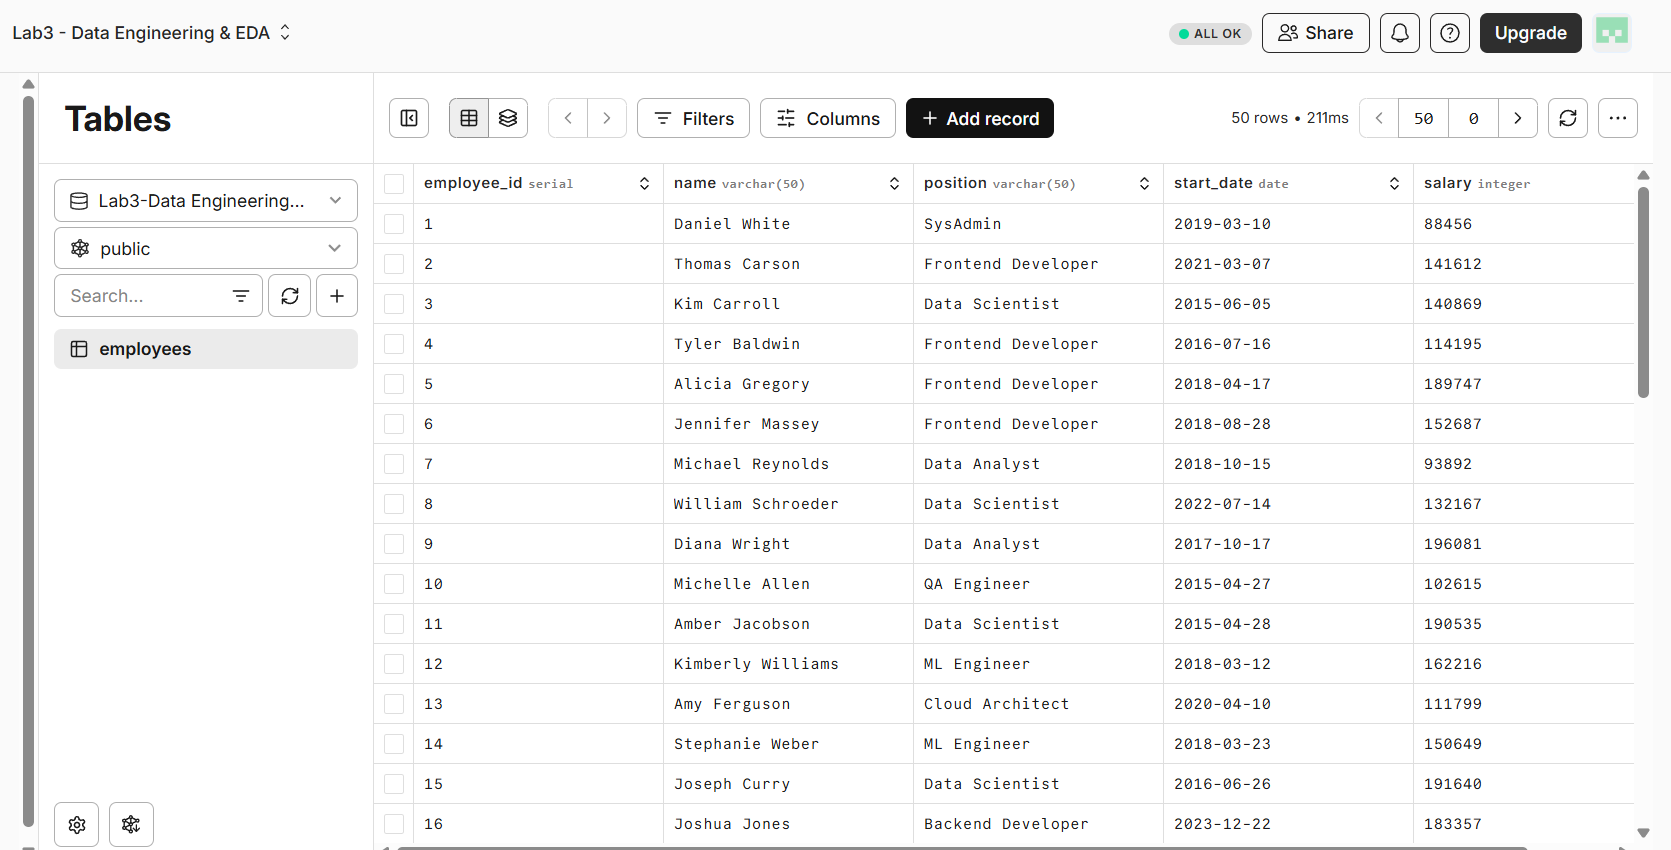

In [10]:
%pip install psycopg2-binary pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
